# Load Data

In [1]:
from data import get_mnist_dataloaders
import torch

from diffusion.transition import (
    linear_beta_schedule,
    build_all_transition_matrices,
    compute_cumulative_transition_matrices,
    sample_q_xt_given_x0
)

import torch

In [23]:
train_loader, test_loader = get_mnist_dataloaders(
    batch_size=2,
    data_root="./data",
    threshold=0.5
)

In [24]:
# Shape is (batch_size, channels, height, width)
x, y = next(iter(train_loader))
x.shape, y.shape

(torch.Size([2, 1, 28, 28]), torch.Size([2]))

In [25]:
# Black or white pixels rather than greyscale
print(torch.unique(x))

tensor([0, 1])


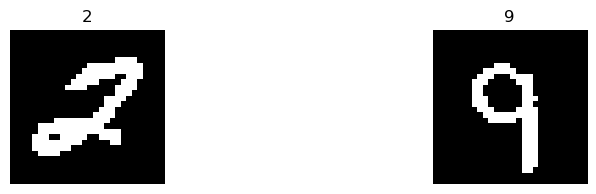

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(x[i].squeeze(), cmap="gray", vmin=0, vmax=1)
    plt.title(y[i].item())
    plt.axis("off")
plt.show()

# Define Transition Matrix for noising

In [27]:
T = 100

betas = linear_beta_schedule(T)
Qs = build_all_transition_matrices(betas)

print(betas.shape)   # torch.Size([100])
print(Qs.shape)       # torch.Size([100, 2, 2])
print(Qs[0])

torch.Size([100])
torch.Size([100, 2, 2])
tensor([[9.9990e-01, 1.0000e-04],
        [1.0000e-04, 9.9990e-01]])


In [28]:
# Define Qbar[t] = Q_1 * Q_2 * ... * Q_t
Qbar = compute_cumulative_transition_matrices(Qs)

In [29]:
print("Qbar[2]:\n", Qbar[1])
print("Qbar[T]:\n", Qbar[T-1])

Qbar[2]:
 tensor([[0.9948, 0.0052],
        [0.0052, 0.9948]])
Qbar[T]:
 tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])


# Noise Data and Visualise

In [31]:
timesteps = [0, 5, 10, 20, 40, 80, 99]

results = []   # list of [(t, x_t_batch)]

for t in timesteps:
    xt_batch = sample_q_xt_given_x0(x, t=t, Qbar=Qbar)
    results.append((t, xt_batch.cpu()))

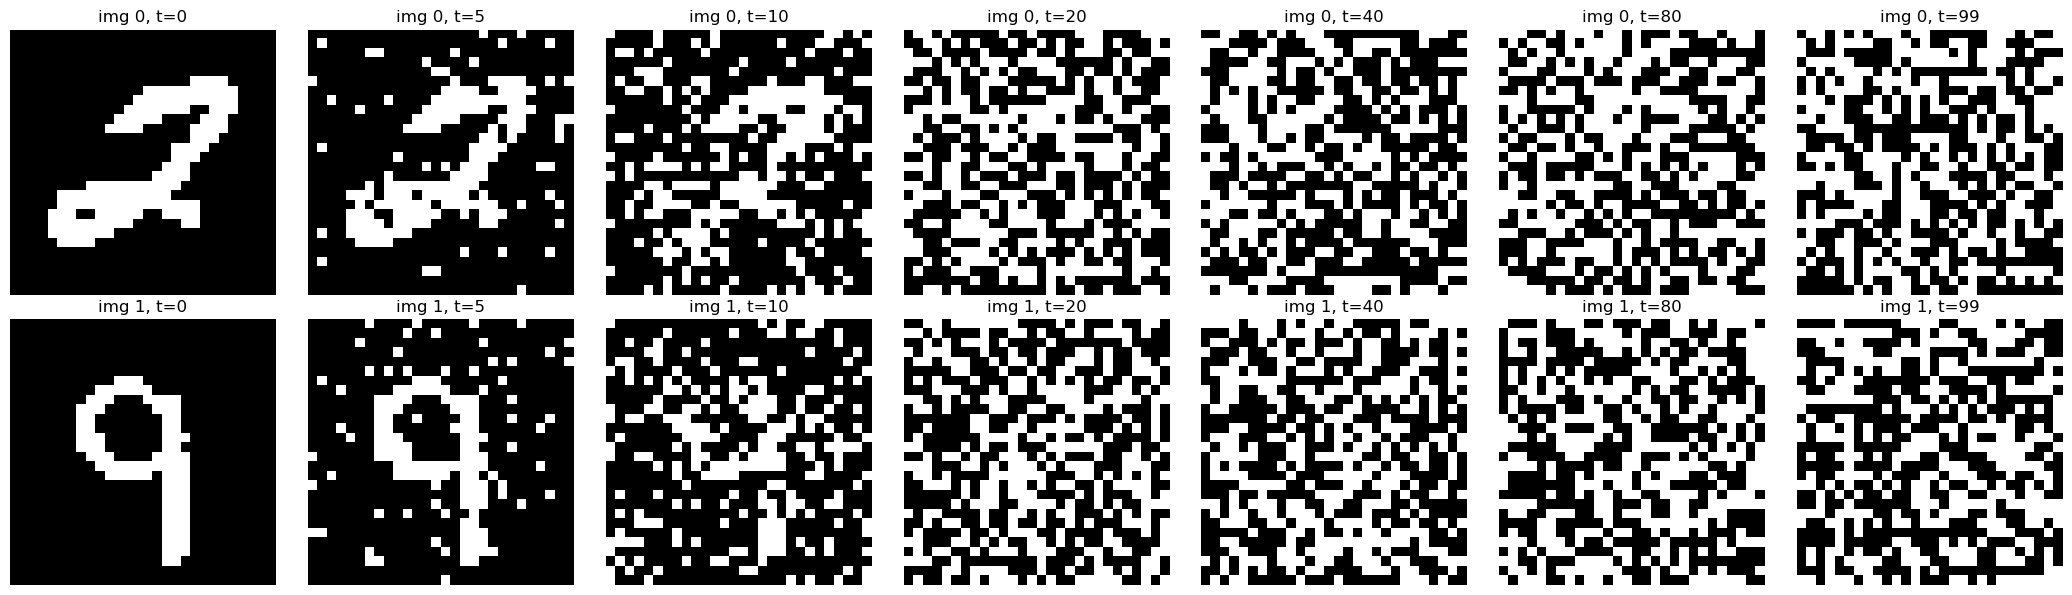

In [32]:
num_images = x.shape[0]        # = 2
num_steps = len(timesteps)

plt.figure(figsize=(3 * num_steps, 3 * num_images))

for img_idx in range(num_images):  # loop over images in the batch
    for step_idx, (t, xt_batch) in enumerate(results):
        plt.subplot(num_images, num_steps, img_idx * num_steps + step_idx + 1)
        plt.imshow(xt_batch[img_idx].squeeze(), cmap="gray", vmin=0, vmax=1)
        plt.title(f"img {img_idx}, t={t}")
        plt.axis("off")

plt.tight_layout()
plt.show()